# LSTM on Cosine Wave

The goal of this project is to train an LSTM (Long Short-Term Memory) model to predict the next values in a cosine wave time series. The LSTM model will learn to capture the underlying patterns and dependencies in the data and generate accurate predictions.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Generating Data Sequence

To generate a data sequence for the cosine wave, you can use the numpy library in Python. 

In [4]:
x = np.linspace(0, 50, 501)
y = np.cos(x)

In [5]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [6]:
y

array([ 1.        ,  0.99500417,  0.98006658,  0.95533649,  0.92106099,
        0.87758256,  0.82533561,  0.76484219,  0.69670671,  0.62160997,
        0.54030231,  0.45359612,  0.36235775,  0.26749883,  0.16996714,
        0.0707372 , -0.02919952, -0.12884449, -0.22720209, -0.32328957,
       -0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
       -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
       -0.9899925 , -0.99913515, -0.99829478, -0.98747977, -0.96679819,
       -0.93645669, -0.89675842, -0.84810003, -0.79096771, -0.7259323 ,
       -0.65364362, -0.57482395, -0.49026082, -0.40079917, -0.30733287,
       -0.2107958 , -0.11215253, -0.01238866,  0.08749898,  0.18651237,
        0.28366219,  0.37797774,  0.46851667,  0.55437434,  0.63469288,
        0.70866977,  0.77556588,  0.83471278,  0.88551952,  0.92747843,
        0.96017029,  0.98326844,  0.9965421 ,  0.99985864,  0.99318492,
        0.97658763,  0.95023259,  0.91438315,  0.86939749,  0.81

# Data Visualization


To visualize the generated data sequence representing a cosine wave, you can use the matplotlib library in Python. 

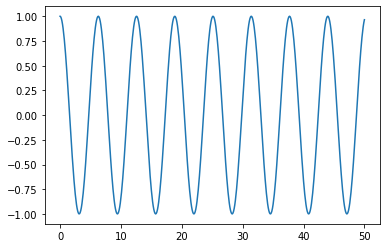

In [19]:
plt.plot(x, y)

In [7]:
x.shape, y.shape

((501,), (501,))

# Creating Dataframe

In [9]:
dataframe = pd.DataFrame(data = y, 
                         index = x, 
                         columns = ['Cosine'])

In [10]:
dataframe.head()

,Cosine
0.0,1.000000
0.1,0.995004
0.2,0.980067
0.3,0.955336
0.4,0.921061


In [11]:
dataframe.tail()

,Cosine
49.6,0.786619
49.7,0.844330
49.8,0.893605
49.9,0.933951
50.0,0.964966


Calculating the test index for a given dataset taking the test percentage is 0.1 (10%), we can perform the following ways:

In [12]:
test_precent = 0.1

In [13]:
len(dataframe)*test_precent

50.1

In [15]:
test_point = np.round(len(dataframe)*test_precent)

In [16]:
test_point

50.0

In [17]:
test_index = int(len(dataframe) - test_point)

In [18]:
test_index

451

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [20]:
train_data = dataframe.iloc[:test_index]
test_data = dataframe.iloc[test_index:]

In [21]:
train_data

,Cosine
0.0,1.000000
0.1,0.995004
0.2,0.980067
0.3,0.955336
0.4,0.921061
...,...
44.6,0.815211
44.7,0.753318
44.8,0.683899
44.9,0.607646


In [22]:
test_data

,Cosine
45.1,0.437749
45.2,0.345802
45.3,0.250400
45.4,0.152496
45.5,0.053069
45.6,-0.046889
45.7,-0.146379
45.8,-0.244405
45.9,-0.339990
46.0,-0.432178


In [23]:
train_data.shape, test_data.shape

((451, 1), (50, 1))

# Scaling Dataset

Scaling is a preprocessing technique used in machine learning to transform the input features to a similar scale. It is often necessary because features can have different units, ranges, or magnitudes, which can affect the performance of certain algorithms. Scaling ensures that all features contribute equally to the learning process and prevents features with larger values from dominating those with smaller values.

MinMaxScaler is a popular scaling technique used in data preprocessing. It scales the features to a specified range, typically between 0 and 1.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(train_data)

MinMaxScaler()

In [27]:
scaled_train = scaler.transform(train_data)
scaled_test = scaler.transform(test_data)

In [28]:
scaled_train

array([[1.00000000e+00],
       [9.97502043e-01],
       [9.90033131e-01],
       [9.77667891e-01],
       [9.60529871e-01],
       [9.38790311e-01],
       [9.12666423e-01],
       [8.82419230e-01],
       [8.48350951e-01],
       [8.10801985e-01],
       [7.70147509e-01],
       [7.26793729e-01],
       [6.81173823e-01],
       [6.33743608e-01],
       [5.84976992e-01],
       [5.35361235e-01],
       [4.85392081e-01],
       [4.35568805e-01],
       [3.86389225e-01],
       [3.38344727e-01],
       [2.91915356e-01],
       [2.47565019e-01],
       [2.05736850e-01],
       [1.66848781e-01],
       [1.31289370e-01],
       [9.94139149e-02],
       [7.15409042e-02],
       [4.79488358e-02],
       [2.88734341e-02],
       [1.45052941e-02],
       [4.98797745e-03],
       [4.16578142e-04],
       [8.36772043e-04],
       [6.24436071e-03],
       [1.65853133e-02],
       [3.17563065e-02],
       [5.16057566e-02],
       [7.59353346e-02],
       [1.04501947e-01],
       [1.37020167e-01],


In [29]:
scaled_test

array([[7.18870024e-01],
       [6.72895859e-01],
       [6.25194098e-01],
       [5.76241359e-01],
       [5.26526762e-01],
       [4.76547040e-01],
       [4.26801572e-01],
       [3.77787400e-01],
       [3.29994256e-01],
       [2.83899675e-01],
       [2.39964217e-01],
       [1.98626872e-01],
       [1.60300668e-01],
       [1.25368549e-01],
       [9.41795436e-02],
       [6.70452831e-02],
       [4.42368838e-02],
       [2.59822397e-02],
       [1.24637452e-02],
       [3.81647260e-03],
       [1.26822581e-04],
       [1.43166091e-03],
       [7.71795008e-03],
       [1.89228796e-02],
       [3.49344934e-02],
       [5.55928089e-02],
       [8.06914149e-02],
       [1.09979534e-01],
       [1.43164530e-01],
       [1.79914829e-01],
       [2.19863234e-01],
       [2.62610594e-01],
       [3.07729790e-01],
       [3.54770008e-01],
       [4.03261237e-01],
       [4.52718969e-01],
       [5.02649038e-01],
       [5.52552559e-01],
       [6.01930913e-01],
       [6.50290728e-01],


# Timeseries Generator

In time series analysis, a common approach is to use a time series generator to generate batches of sequential data for training recurrent neural networks (RNNs) or other time-based models. This allows you to efficiently process and train models on large time series datasets. Here's an example of how you can create a time series generator using the TimeseriesGenerator calss.

In [30]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

Early stopping is a technique commonly used in machine learning projects, including those involving neural networks such as LSTM, to prevent overfitting and determine the optimal number of training iterations. It allows you to monitor the model's performance during training and stop the training process when the model starts to show signs of overfitting or when further training is unlikely to improve the model's performance.

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [34]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

In [35]:
n_features = 1

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [36]:
model = Sequential()
model.add(LSTM(49, input_shape = (length, n_features)))
model.add(Dense(1))

# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [37]:
model.compile(optimizer = 'adam', loss = 'mse')

# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance

In [38]:
model.fit_generator(generator, epochs = 10, 
                    validation_data = validation_generator, 
                    callbacks = [early_stop])

C:\Users\DELL\AppData\Local\Temp\ipykernel_13240\2873715417.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 10,


Epoch 1/10
402/402 [==============================] - 28s 43ms/step - loss: 0.0256 - val_loss: 1.1629e-04
Epoch 2/10
402/402 [==============================] - 15s 36ms/step - loss: 1.5177e-04 - val_loss: 9.3613e-04
Epoch 3/10
402/402 [==============================] - 14s 34ms/step - loss: 1.2684e-04 - val_loss: 9.1914e-06
Epoch 4/10
402/402 [==============================] - 14s 34ms/step - loss: 4.1559e-04 - val_loss: 2.1737e-07
Epoch 5/10
402/402 [==============================] - 14s 35ms/step - loss: 5.5201e-05 - val_loss: 9.6246e-04
Epoch 6/10
402/402 [==============================] - 14s 35ms/step - loss: 6.3472e-05 - val_loss: 5.6882e-04


In [39]:
model.save('model_cosine_wave.h5')

# Learning Curve for x-Test Data

The learning curve is a plot that shows how the loss and accuracy of a model change during training. It provides insights into how well the model is learning from the training data and how it generalizes to unseen data. The learning curve typically shows the training and validation loss/accuracy on the y-axis and the number of epochs on the x-axis. By analyzing the learning curve, you can identify if the model is overfitting (high training loss, low validation loss) or underfitting (high training and validation loss). It is a useful tool for monitoring and evaluating the performance of machine learning models.

In [40]:
loss = pd.DataFrame(model.history.history)

In [41]:
loss.head()

,loss,val_loss
0,0.025635,1.162889e-04
1,0.000152,9.361273e-04
2,0.000127,9.191391e-06
3,0.000416,2.173681e-07
4,0.000055,9.624614e-04


<AxesSubplot:>

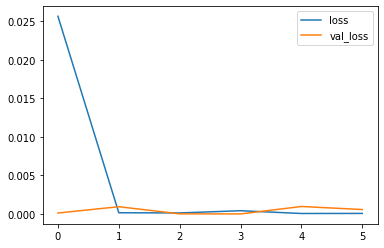

In [42]:
loss.plot()

# Predicting On x-Test Data

In [44]:
prediction = []
evaluation_batch = scaled_train[-length:]
current_batch = evaluation_batch.reshape(1, length, n_features)
for i in range (len(test_data)):
    current_prediction = model.predict(current_batch)[0]
    prediction.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis = 1)

1/1 [==============================] - 0s 47ms/step


In [45]:
prediction = scaler.inverse_transform(prediction)

In [46]:
prediction

array([[ 0.36635819],
       [ 0.27397103],
       [ 0.17533751],
       [ 0.07272819],
       [-0.03212705],
       [-0.13772514],
       [-0.24270436],
       [-0.34580779],
       [-0.44586351],
       [-0.54178062],
       [-0.63254748],
       [-0.71723022],
       [-0.7949684 ],
       [-0.86496883],
       [-0.92649799],
       [-0.97887878],
       [-1.02149553],
       [-1.05381046],
       [-1.07539031],
       [-1.08593681],
       [-1.08531581],
       [-1.07357213],
       [-1.05093183],
       [-1.01778577],
       [-0.97466369],
       [-0.92220097],
       [-0.86110774],
       [-0.79214265],
       [-0.71609465],
       [-0.63377228],
       [-0.54600103],
       [-0.45362516],
       [-0.35751205],
       [-0.25855906],
       [-0.15769721],
       [-0.05589367],
       [ 0.04585014],
       [ 0.14650256],
       [ 0.24501376],
       [ 0.34032783],
       [ 0.43139811],
       [ 0.51720514],
       [ 0.59677215],
       [ 0.66918206],
       [ 0.73359101],
       [ 0

In [47]:
test_data['Prediction'] = prediction

C:\Users\DELL\AppData\Local\Temp\ipykernel_13240\319166890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Prediction'] = prediction


In [48]:
test_data.head()

,Cosine,Prediction
45.1,0.437749,0.366358
45.2,0.345802,0.273971
45.3,0.250400,0.175338
45.4,0.152496,0.072728
45.5,0.053069,-0.032127


# Predicted x-Test Value And Actual Value

<AxesSubplot:>

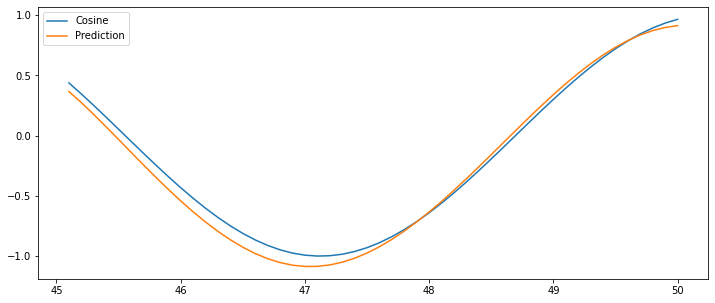

In [49]:
test_data.plot(figsize = (12, 5))

# Predicting For Full Dataframe

In [50]:
full_scaler = MinMaxScaler()

In [51]:
full_data_scale = scaler.transform(dataframe)
length = 50 
generator = TimeseriesGenerator(full_data_scale, full_data_scale, length=length, batch_size=1)
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=6)

Epoch 1/6


C:\Users\DELL\AppData\Local\Temp\ipykernel_13240\3729857326.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=6)


451/451 [==============================] - 22s 35ms/step - loss: 0.0114
Epoch 2/6
451/451 [==============================] - 18s 39ms/step - loss: 1.1194e-04
Epoch 3/6
451/451 [==============================] - 16s 35ms/step - loss: 2.2217e-04
Epoch 4/6
451/451 [==============================] - 16s 35ms/step - loss: 1.2069e-04
Epoch 5/6
451/451 [==============================] - 16s 36ms/step - loss: 1.4240e-04
Epoch 6/6
451/451 [==============================] - 16s 35ms/step - loss: 1.3765e-04


In [52]:
model.save('model_full_cosine.h5')

In [53]:
losses = pd.DataFrame(model.history.history)

In [54]:
losses.head()

,loss
0,0.011387
1,0.000112
2,0.000222
3,0.000121
4,0.000142


<AxesSubplot:>

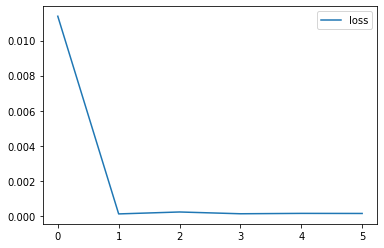

In [55]:
losses.plot()

In [57]:
prediction = []
evaluation_batch = full_data_scale[-length:]
current_batch = evaluation_batch.reshape(1, length, n_features)
for i in range (len(test_data)):
    current_prediction = model.predict(current_batch)[0]
    prediction.append(current_prediction)
    current_batch = np.append(current_batch[:, 1:, :], [[current_prediction]], axis = 1)

1/1 [==============================] - 0s 31ms/step


In [58]:
prediction = scaler.inverse_transform(prediction)

In [60]:
prediction

array([[ 0.9523478 ],
       [ 0.95739742],
       [ 0.9510898 ],
       [ 0.93375621],
       [ 0.90589088],
       [ 0.86803288],
       [ 0.82076989],
       [ 0.76473859],
       [ 0.70062647],
       [ 0.62916891],
       [ 0.55114468],
       [ 0.46737657],
       [ 0.37872632],
       [ 0.28609382],
       [ 0.1904157 ],
       [ 0.09266265],
       [-0.00616499],
       [-0.10504252],
       [-0.20292819],
       [-0.2987741 ],
       [-0.39153772],
       [-0.48019792],
       [-0.56377149],
       [-0.64132931],
       [-0.71201513],
       [-0.77506035],
       [-0.82979705],
       [-0.87566911],
       [-0.91223768],
       [-0.93918462],
       [-0.95631139],
       [-0.96353659],
       [-0.96088994],
       [-0.94850605],
       [-0.92661688],
       [-0.89554447],
       [-0.85569307],
       [-0.80754261],
       [-0.75164173],
       [-0.68860208],
       [-0.61909302],
       [-0.54383679],
       [-0.46360414],
       [-0.37921042],
       [-0.29151103],
       [-0

# Predicted Value Along With Actual Value

In [61]:
prediction_index = np.arange(50.1,55.1,step=0.1)

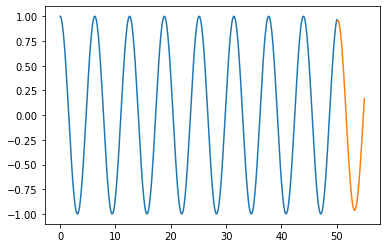

In [63]:
plt.plot(dataframe.index,dataframe['Cosine'])
plt.plot(prediction_index,prediction)

# Thanks !